Score the output of Juanjo's algorithm on the full mixes in the medleydb test set against the melody2 annotations

In [2]:
import numpy as np
import mir_eval
import os
import medleydb as mdb
import seaborn
import glob
import json
import librosa
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open("../outputs/data_splits.json", 'r') as fhandle:
    dat_dict = json.load(fhandle)

AClassicEducation_NightOwl


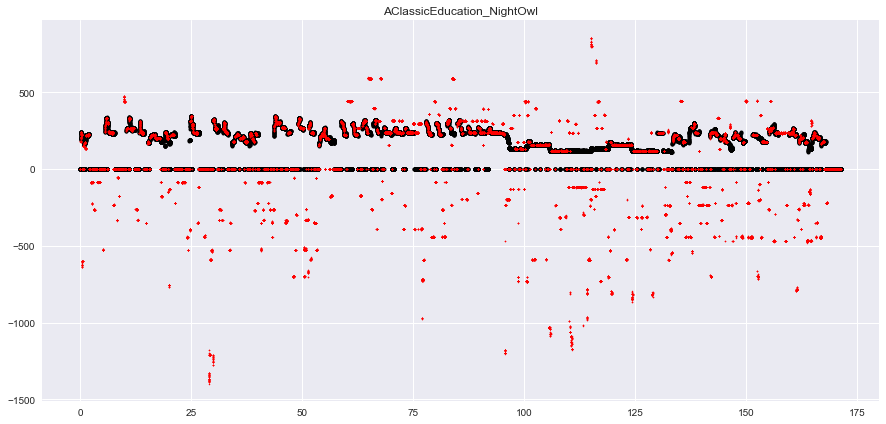

/usr/local/lib/python2.7/site-packages/mir_eval/melody.py:231: UserWarning: Non-uniform timescale passed to resample_melody_series.  Pitch will be linearly interpolated, which will result in undesirable behavior if silences are indicated by missing values.  Silences should be indicated by nonpositive frequency values.
  "Non-uniform timescale passed to resample_melody_series.  Pitch "


Auctioneer_OurFutureFaces


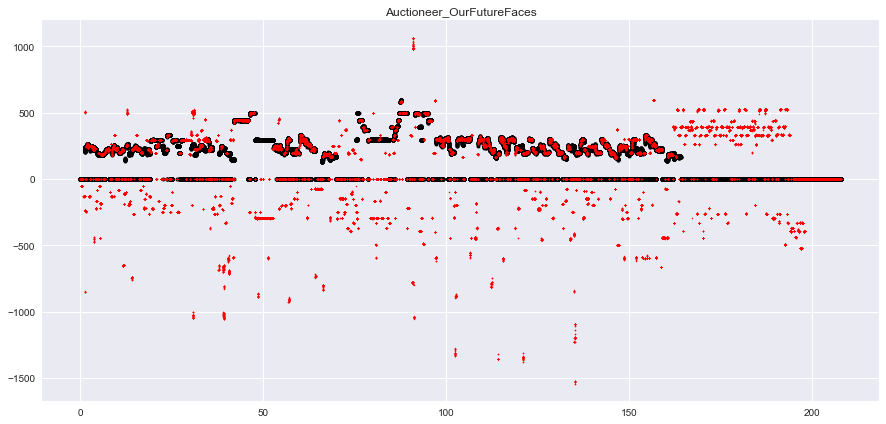

CelestialShore_DieForUs


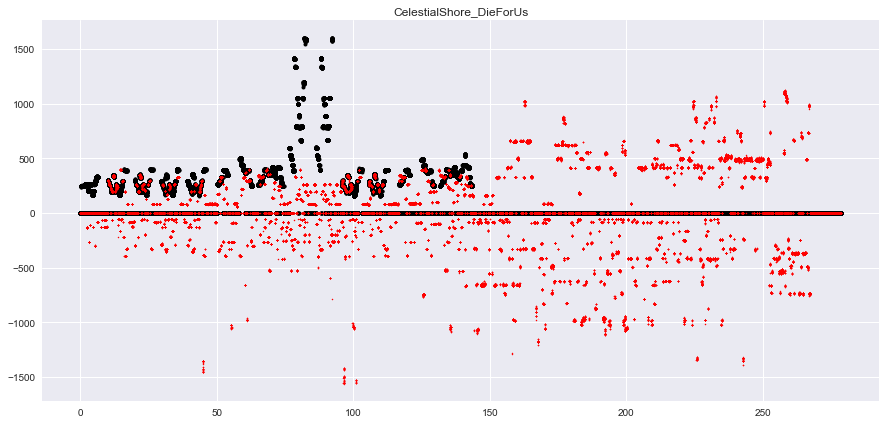

ChrisJacoby_BoothShotLincoln


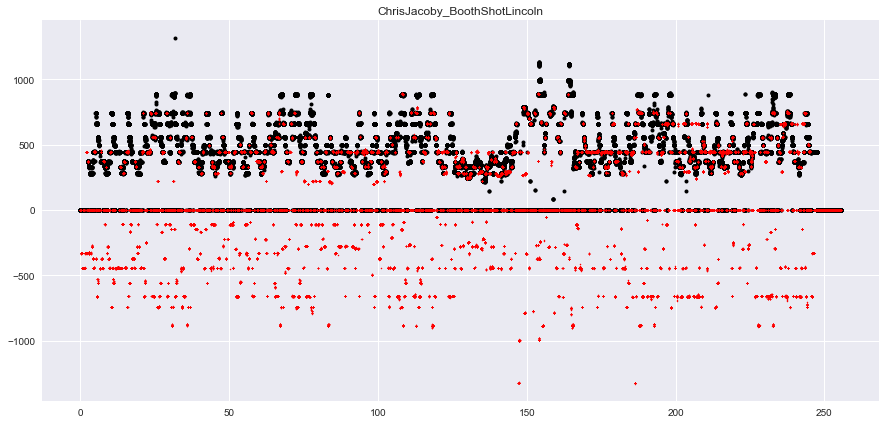

ChrisJacoby_PigsFoot


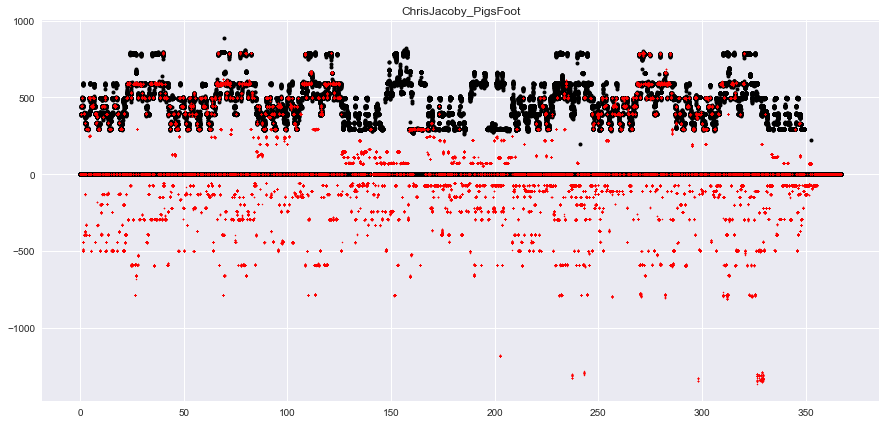

Creepoid_OldTree


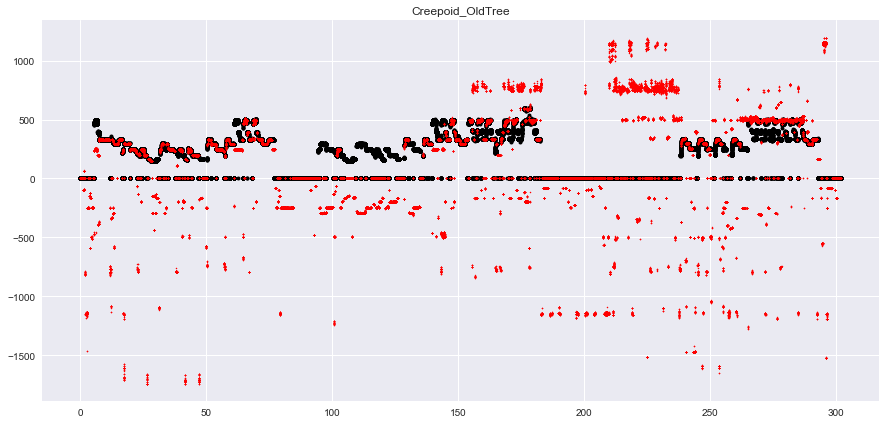

Debussy_LenfantProdigue


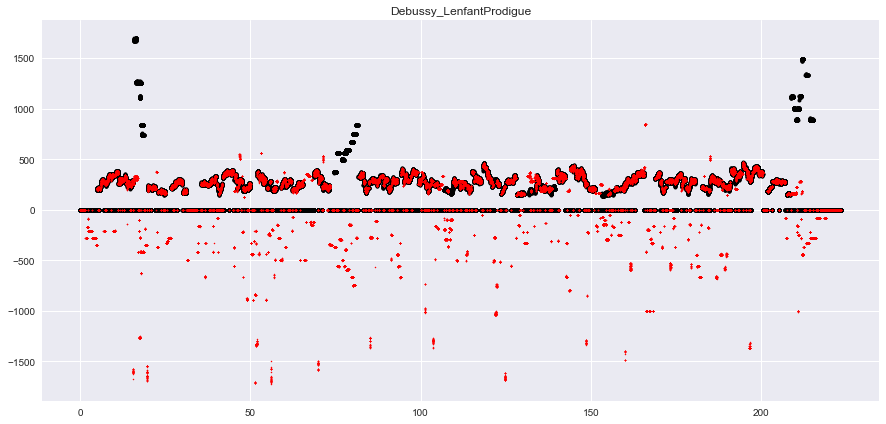

Grants_PunchDrunk
Grants_PunchDrunk
MatthewEntwistle_DontYouEver


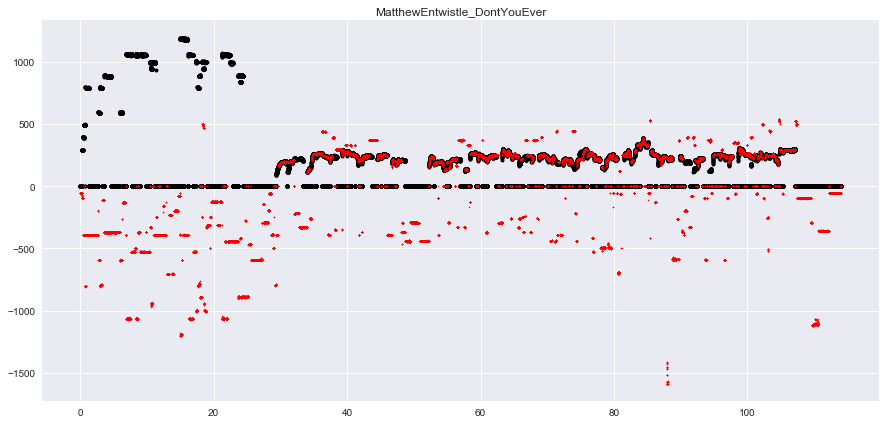

MatthewEntwistle_FairerHopes


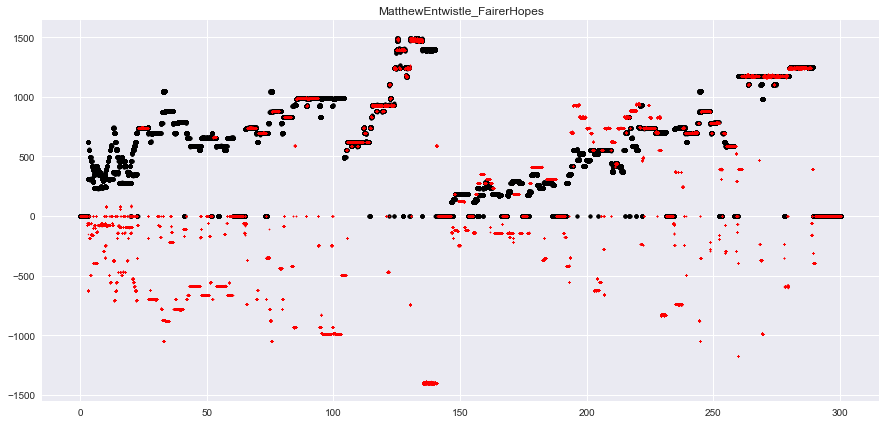

MatthewEntwistle_ImpressionsOfSaturn


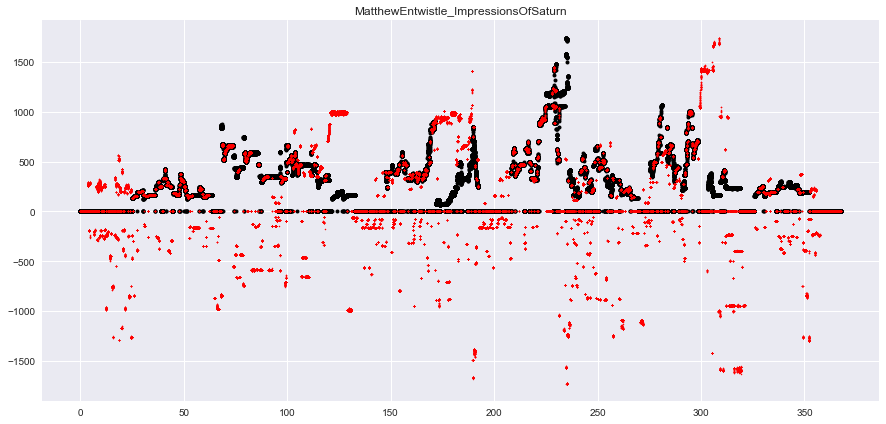

MatthewEntwistle_Lontano


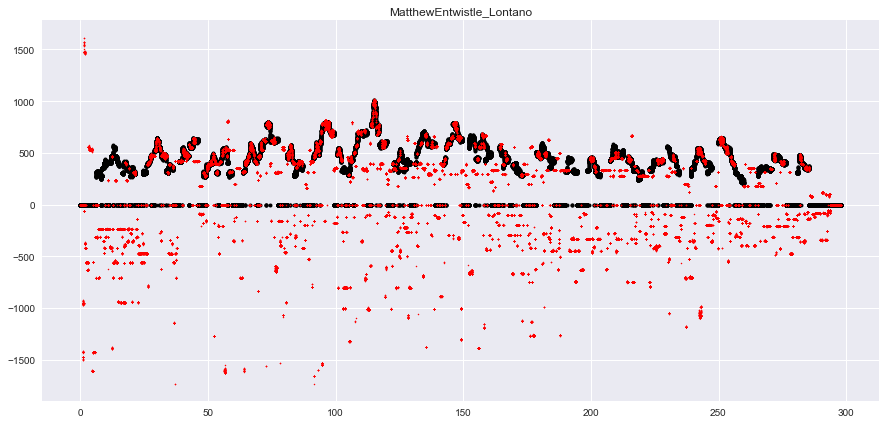

MatthewEntwistle_TheArch


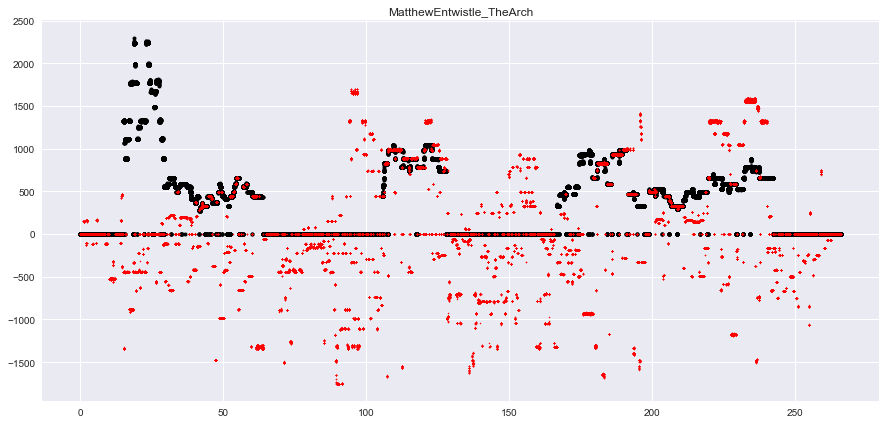

MatthewEntwistle_TheFlaxenField


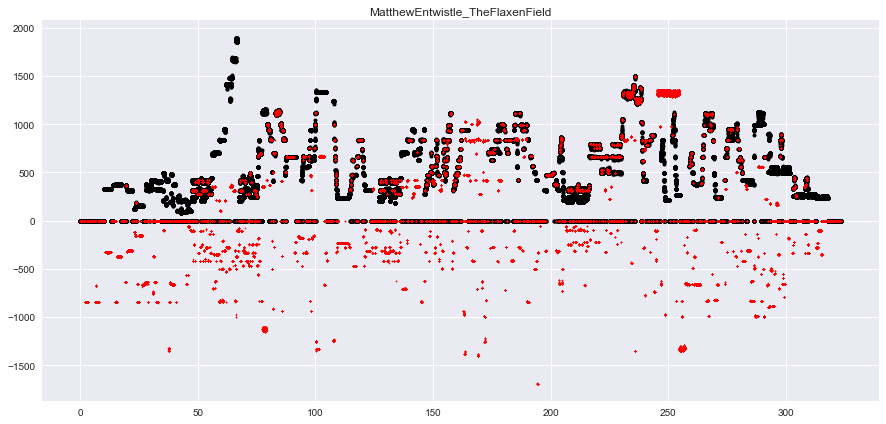

Mozart_DiesBildnis


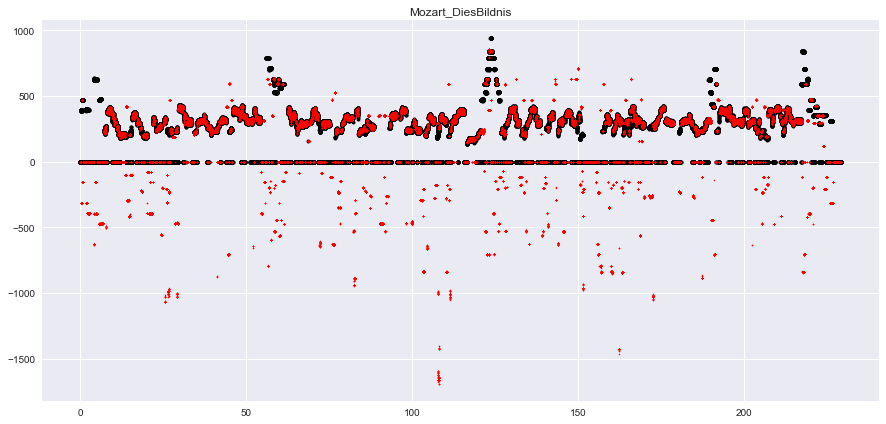

MusicDelta_FusionJazz


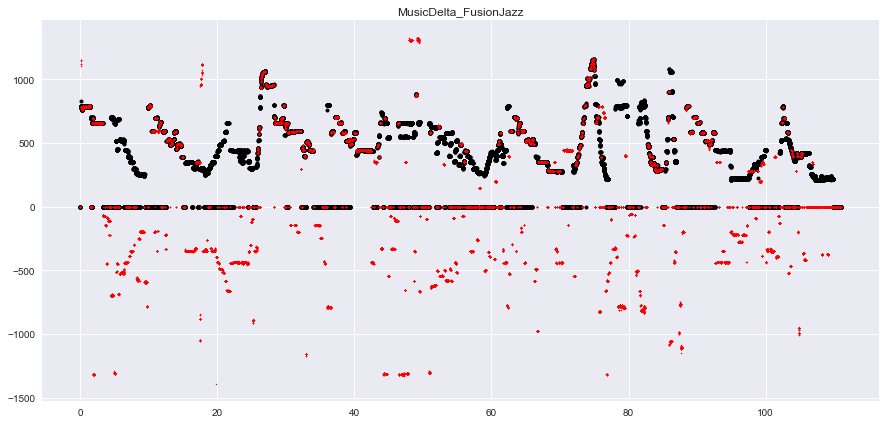

MusicDelta_Gospel


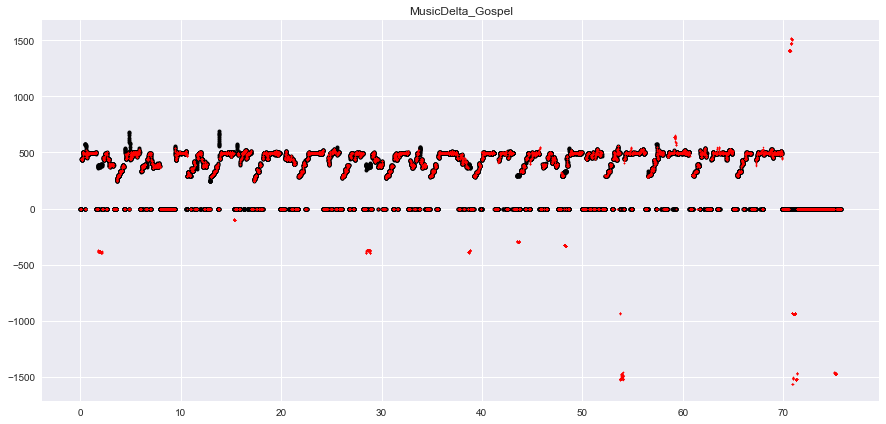

MusicDelta_Pachelbel


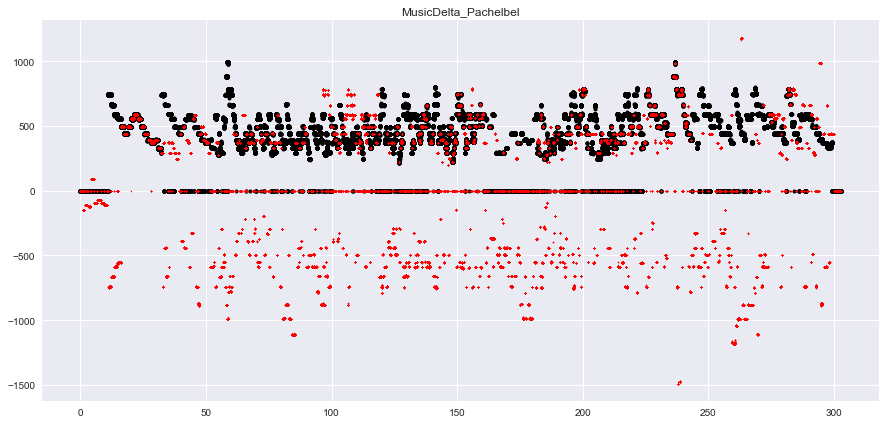

MusicDelta_SwingJazz


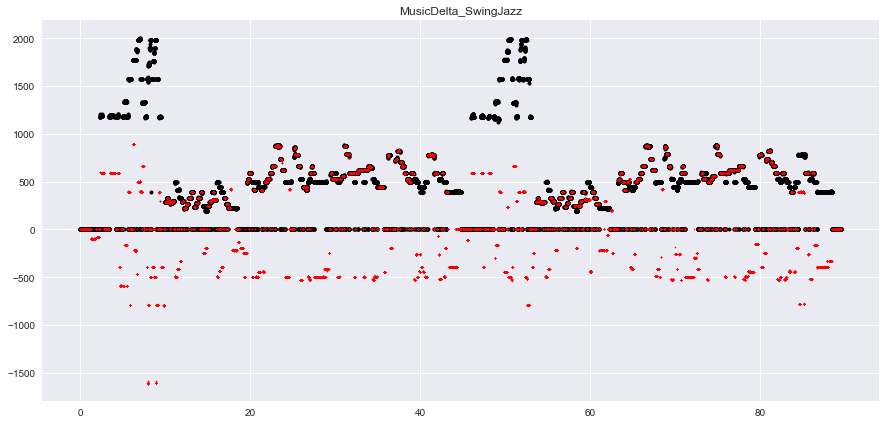

Phoenix_BrokenPledgeChicagoReel


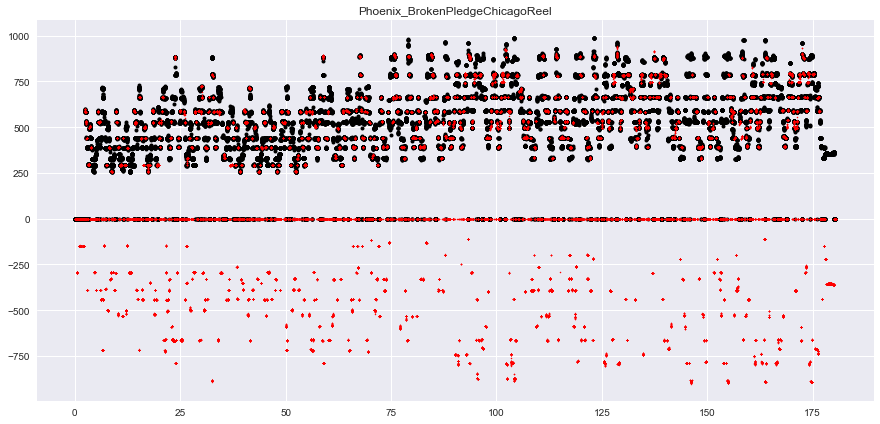

Phoenix_ColliersDaughter


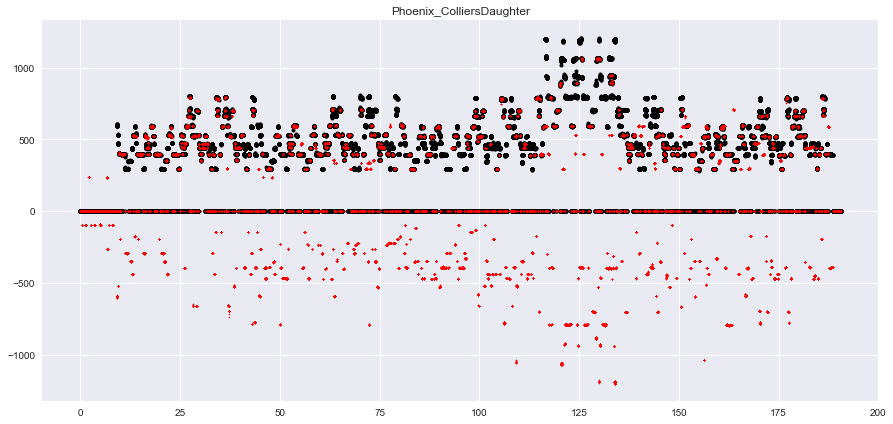

Phoenix_ElzicsFarewell


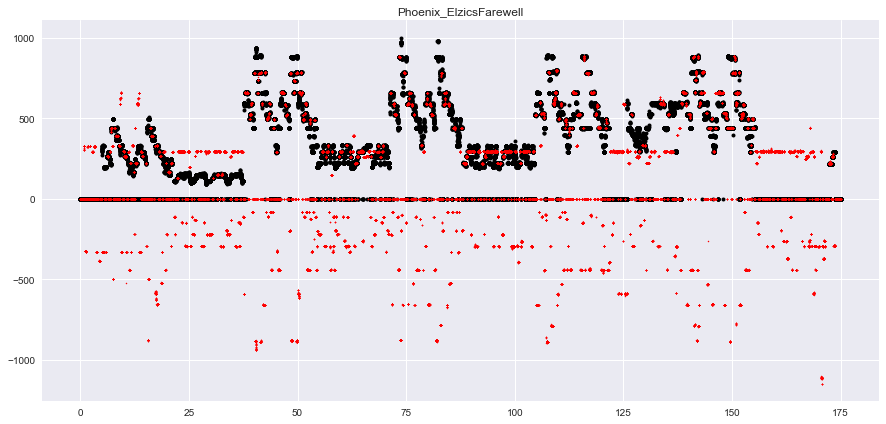

Phoenix_LarkOnTheStrandDrummondCastle


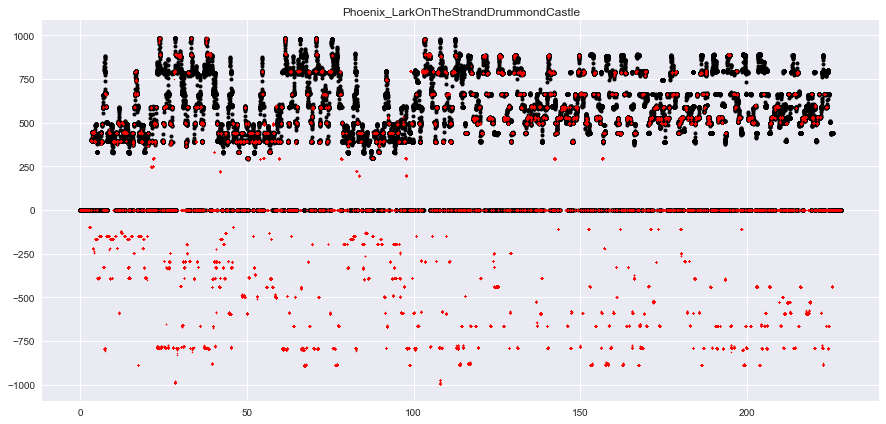

Phoenix_ScotchMorris


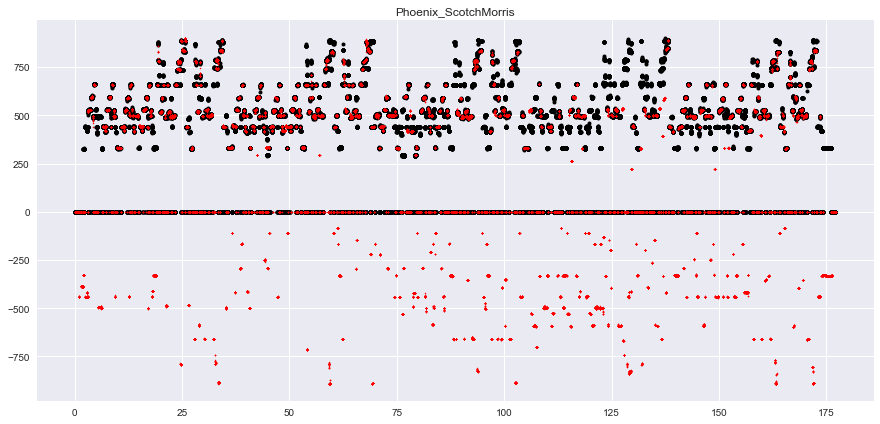

Phoenix_SeanCaughlinsTheScartaglen


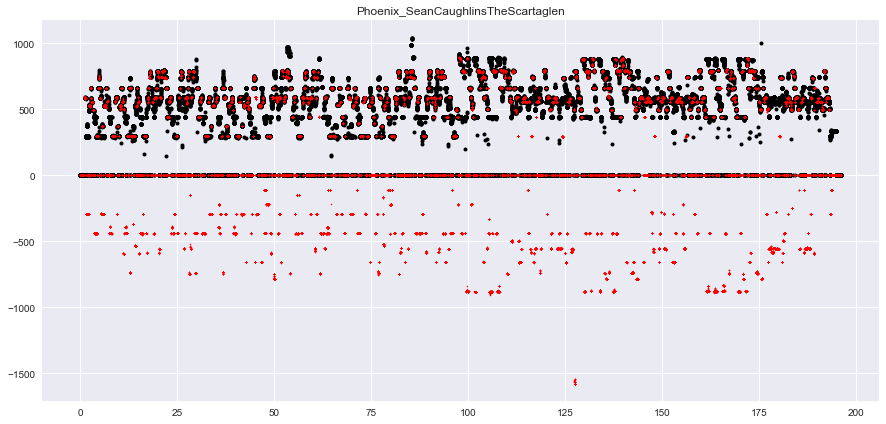

PortStWillow_StayEven


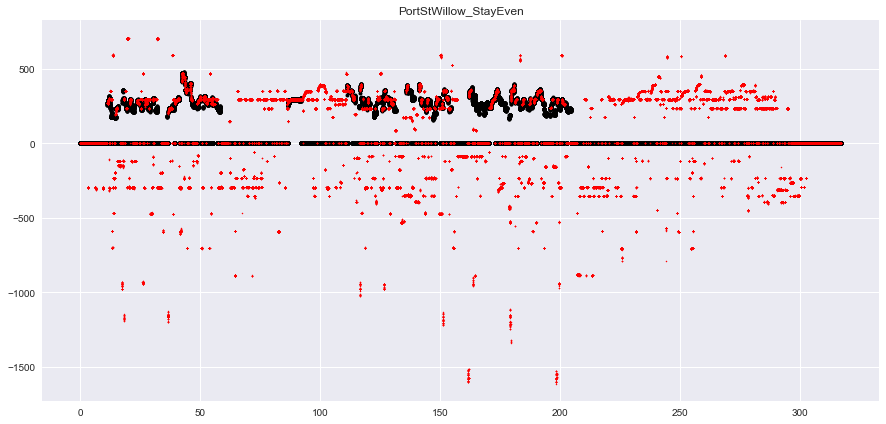

Schubert_Erstarrung


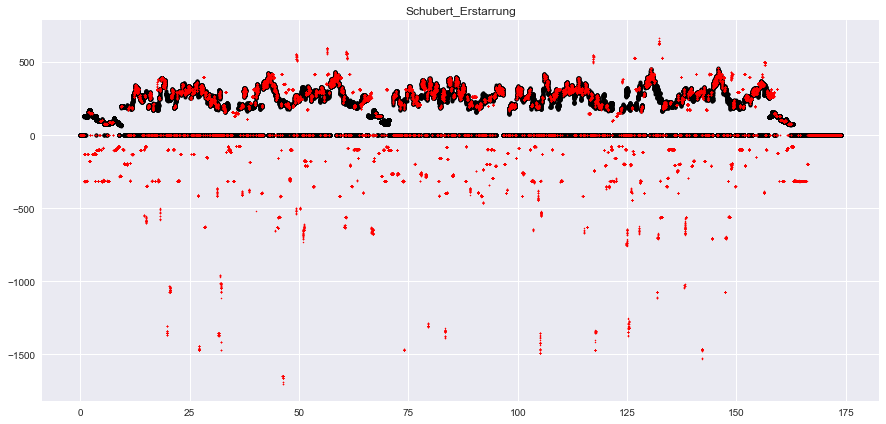

StrandOfOaks_Spacestation


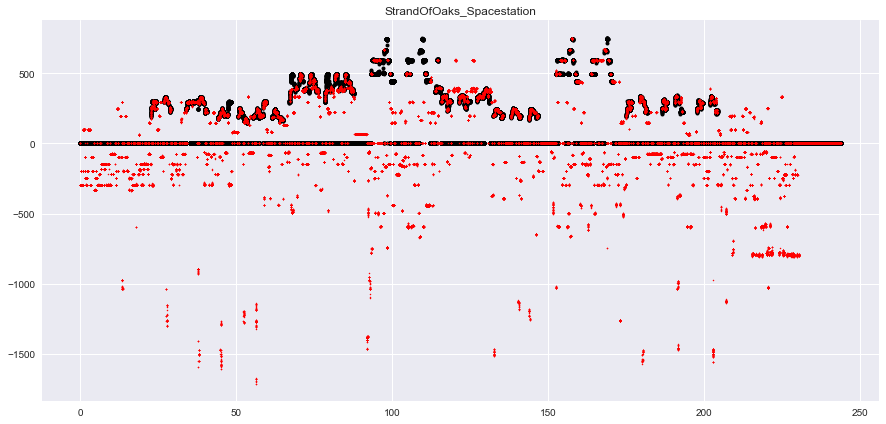

In [4]:
all_mel_scores = []
for trackid in dat_dict['test']:
    print(trackid)
    mtrack = mdb.MultiTrack(trackid)
    
    pred_path = "../comparisons/melody2/juanjo_mdb_out/{}_mix.pitch".format(trackid)
    if not os.path.exists(pred_path) or not os.path.exists(mtrack.melody2_fpath):
        print(trackid)
        continue

    est_times, est_freqs = mir_eval.io.load_time_series(pred_path)

    mel2 = mtrack.melody2_annotation
    mel2 = np.array(mel2).T
    ref_times, ref_freqs = (mel2[0], mel2[1])
    
    plt.figure(figsize=(15, 7))
    plt.title(trackid)
    plt.plot(ref_times, ref_freqs, '.k', markersize=8)
    plt.plot(est_times, est_freqs, '.r', markersize=3)
    plt.show()

    mel_scores = mir_eval.melody.evaluate(ref_times, ref_freqs, est_times, est_freqs)
    all_mel_scores.append(mel_scores)

mel_scores_df_partial = pd.DataFrame(all_mel_scores)
mel_scores_df_partial.to_csv("../outputs/juanjo_mdb_scores.csv")

In [5]:
mel_scores_df_partial.describe()

,Overall Accuracy,Raw Chroma Accuracy,Raw Pitch Accuracy,Voicing False Alarm,Voicing Recall
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.565634,0.691321,0.623177,0.248677,0.623546
std,0.127208,0.126337,0.149370,0.097572,0.125776
min,0.333819,0.438441,0.303735,0.101989,0.450803
25%,0.476282,0.622277,0.510344,0.195668,0.521752
50%,0.559132,0.700759,0.643358,0.225763,0.606613
75%,0.598104,0.769768,0.716211,0.291395,0.704172
max,0.923737,0.970084,0.969399,0.459128,0.945764


In [6]:
for trackid in dat_dict['test']:
    print(trackid)

AClassicEducation_NightOwl
Auctioneer_OurFutureFaces
CelestialShore_DieForUs
ChrisJacoby_BoothShotLincoln
ChrisJacoby_PigsFoot
Creepoid_OldTree
Debussy_LenfantProdigue
Grants_PunchDrunk
MatthewEntwistle_DontYouEver
MatthewEntwistle_FairerHopes
MatthewEntwistle_ImpressionsOfSaturn
MatthewEntwistle_Lontano
MatthewEntwistle_TheArch
MatthewEntwistle_TheFlaxenField
Mozart_DiesBildnis
MusicDelta_FusionJazz
MusicDelta_Gospel
MusicDelta_Pachelbel
MusicDelta_SwingJazz
Phoenix_BrokenPledgeChicagoReel
Phoenix_ColliersDaughter
Phoenix_ElzicsFarewell
Phoenix_LarkOnTheStrandDrummondCastle
Phoenix_ScotchMorris
Phoenix_SeanCaughlinsTheScartaglen
PortStWillow_StayEven
Schubert_Erstarrung
StrandOfOaks_Spacestation
